<a href="https://colab.research.google.com/github/Yugsolanki/AIML-Healthcare-Lab/blob/main/5_AIML_Hons_Natural_Language_Entity_Extraction_from_Medical_Reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 5<br>
Yug Solanki<br>
BE-4, 58<br>
21UF16526CM057<br>
[Colab Link🔗](https://colab.research.google.com/drive/1c_G59b7qCrfNi_xOA3bYpXNGsQaQKYM2?usp=sharing)

In [ ]:
!kaggle datasets download -d tboyle10/medicaltranscriptions

Dataset URL: https://www.kaggle.com/datasets/tboyle10/medicaltranscriptions
License(s): CC0-1.0
  0% 0.00/4.85M [00:00<?, ?B/s]
100% 4.85M/4.85M [00:00<00:00, 57.3MB/s]


In [ ]:
!unzip medicaltranscriptions.zip

Archive:  medicaltranscriptions.zip
  inflating: mtsamples.csv           


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import spacy
from spacy import displacy
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
df = pd.read_csv('/content/mtsamples.csv')

# Display basic information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [ ]:
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


# Data Preprocessing

In [ ]:
# Preprocess the text
def preprocess_text(text):
    if pd.isna(text):
        return ""
    if not isinstance(text, str):
        text = str(text)
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

In [ ]:
# Apply preprocessing and handle errors
df['processed_text'] = df['transcription'].apply(lambda x: preprocess_text(x) if pd.notna(x) else "")

# Entity Extraction

In [ ]:
def extract_entities(text):
    if pd.isna(text) or text == "":
        return []
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [ ]:
# Apply entity extraction to a sample of the dataset
sample_size = min(100, len(df))  # Adjust sample size based on computational resources
df_sample = df.sample(sample_size, random_state=42)
df_sample['entities'] = df_sample['transcription'].apply(extract_entities)

In [ ]:
# Display sample results
print(df_sample[['transcription', 'entities']].head())

                                          transcription  \
84    OPERATIVE NOTE:  ,The patient was taken to the...   
2470  VITAL SIGNS:,  Reveal a blood pressure of *, t...   
2804  HISTORY: , Neurologic consultation was request...   
4987  ANATOMICAL SUMMARY,1. Sharp force wound of nec...   
4924  INDICATIONS FOR PROCEDURE:, The patient has pr...   

                                               entities  
84    [(about 3 mm, QUANTITY), (8, CARDINAL), (12, C...  
2470  [(Funduscopic, GPE), (Tympanic, DATE), (Trache...  
2804  [(3-year 3 months old, DATE), (XYZ, ORG), (UCS...  
4987  [(wounds).,NOTES, PRODUCT), (PROCEDURES,1, ORG...  
4924  [(subclavian, NORP), (250 cm, QUANTITY), (seco...  


# Data Visualization

In [ ]:
# Entity frequency visualization
entity_freq = {}
for entities in df_sample['entities']:
    for entity, label in entities:
        if label not in entity_freq:
            entity_freq[label] = 1
        else:
            entity_freq[label] += 1

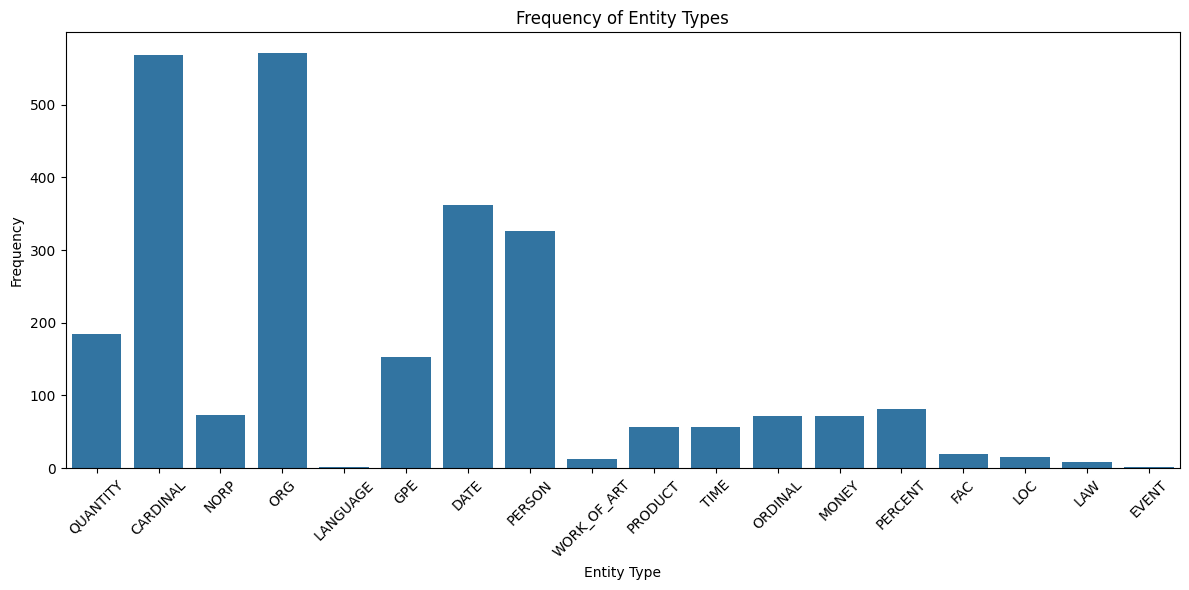

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(entity_freq.keys()), y=list(entity_freq.values()))
plt.title('Frequency of Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

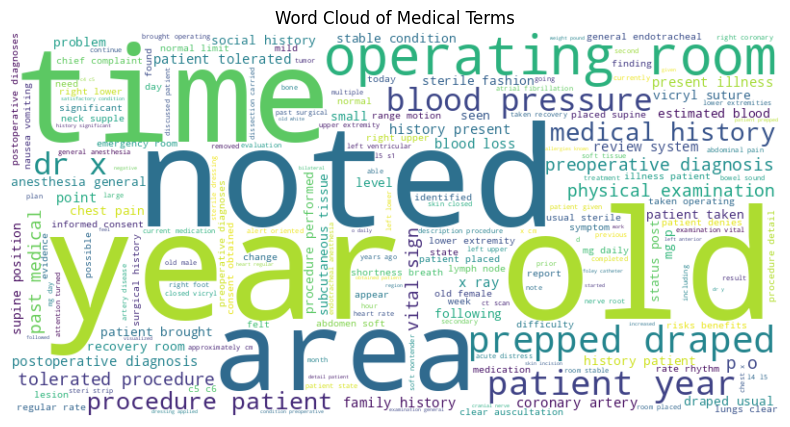

In [ ]:
# Word cloud of medical terms
medical_text = " ".join(df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(medical_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Medical Terms')
plt.show()

# Data Analysis

Correlation between document length and number of entities: 0.79


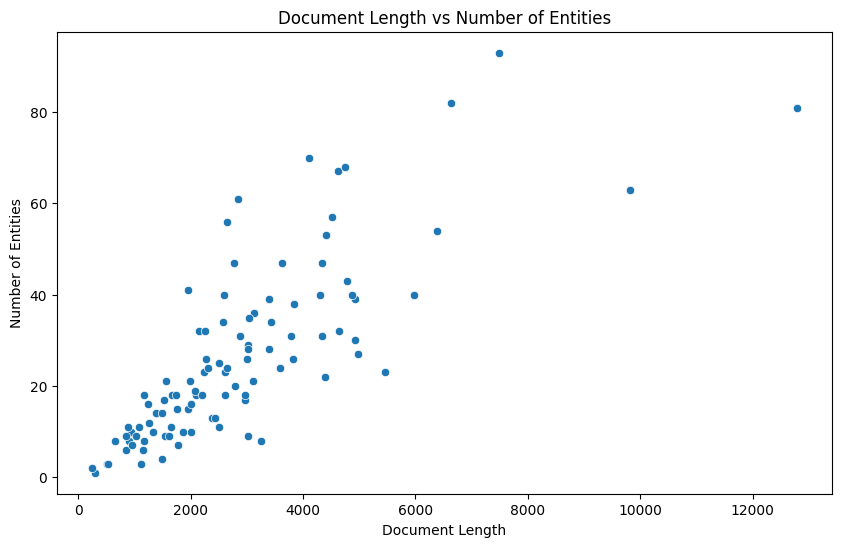

In [ ]:
# Analyze correlation between document length and number of entities
df_sample['doc_length'] = df_sample['transcription'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
df_sample['entity_count'] = df_sample['entities'].apply(len)

correlation = df_sample['doc_length'].corr(df_sample['entity_count'])
print(f"Correlation between document length and number of entities: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='doc_length', y='entity_count', data=df_sample)
plt.title('Document Length vs Number of Entities')
plt.xlabel('Document Length')
plt.ylabel('Number of Entities')
plt.show()

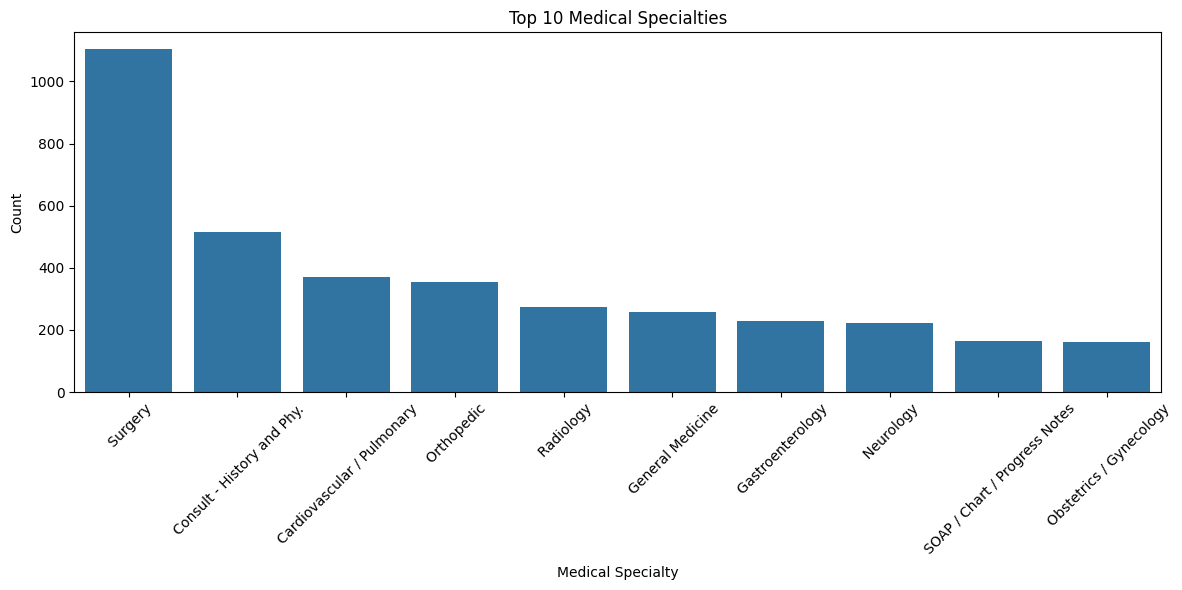

In [ ]:
# Analyze distribution of medical specialties
specialty_counts = df['medical_specialty'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=specialty_counts.index[:10], y=specialty_counts.values[:10])
plt.title('Top 10 Medical Specialties')
plt.xlabel('Medical Specialty')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Entity Visualization

In [ ]:
# Visualize entities in a sample text
sample_text = df_sample['transcription'].iloc[0]
if pd.notna(sample_text):
    doc = nlp(sample_text)
    displacy.render(doc, style="ent", jupyter=True)
else:
    print("The selected sample text is empty or NaN. Please choose another sample.")

# Conclusion and Next Steps

In [ ]:
print("Experiment Conclusions:")
print("1. We successfully extracted entities from medical reports using spaCy.")
print("2. The most common entity types were: ", ", ".join(list(entity_freq.keys())[:5]))
print(f"3. There is a {correlation:.2f} correlation between document length and number of entities.")
print("4. The word cloud reveals common medical terms in the dataset.")
print("5. The top medical specialty in the dataset is: ", specialty_counts.index[0])

Experiment Conclusions:
1. We successfully extracted entities from medical reports using spaCy.
2. The most common entity types were:  QUANTITY, CARDINAL, NORP, ORG, LANGUAGE
3. There is a 0.79 correlation between document length and number of entities.
4. The word cloud reveals common medical terms in the dataset.
5. The top medical specialty in the dataset is:   Surgery
